In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly as py
py.offline.init_notebook_mode(connected = True)

from datetime import datetime, timedelta
from datetime import time
import datetime as dt

# filter out warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [3]:
df=pd.read_csv(r"C:\Users\abhis\Downloads\sales_06_FY2020-21.csv (1)\sales_06_FY2020-21 copy.csv")
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [4]:
df.shape  # we have total 36 Columns with 286392 Rows

(286392, 36)

In [5]:
df.isnull().sum() # Checking whether the data have any Null Values

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [6]:
df.duplicated().sum() # the data does not have any duplicated values

0

In [7]:
# To check the null values of every column to understand the data more
for col in df:
    print("{}".format(col))
    print(df[col].unique())
    print('\n')
    print("---------------")

order_id
[100354678 100354680 100367357 ... 100562383 100562384 100562386]


---------------
order_date
['2020-10-01' '2020-11-13' '2020-10-08' '2020-10-21' '2020-12-24'
 '2020-12-28' '2020-10-22' '2020-10-24' '2020-10-25' '2020-10-09'
 '2020-10-16' '2020-10-17' '2020-10-19' '2020-10-02' '2020-10-11'
 '2020-11-01' '2020-12-08' '2020-12-23' '2021-02-01' '2021-06-25'
 '2021-09-19' '2020-10-10' '2020-10-14' '2020-11-07' '2020-12-20'
 '2021-02-17' '2021-04-02' '2021-04-06' '2021-04-12' '2021-07-23'
 '2021-07-28' '2021-08-17' '2020-11-06' '2020-11-21' '2020-12-13'
 '2020-12-22' '2021-02-04' '2021-03-01' '2021-03-03' '2021-04-03'
 '2021-04-15' '2021-05-21' '2020-10-12' '2021-06-29' '2020-10-06'
 '2020-10-05' '2020-12-01' '2020-12-07' '2020-12-27' '2021-01-21'
 '2021-01-24' '2021-01-25' '2021-02-09' '2021-02-14' '2021-02-19'
 '2021-02-20' '2021-02-26' '2021-02-28' '2021-03-17' '2021-03-20'
 '2021-03-25' '2021-03-27' '2021-04-14' '2021-05-19' '2021-05-28'
 '2021-05-30' '2021-05-31' '2021-06-08

In [8]:
# Checking if these two columns contains the same values. so I can keep the "City" column only.
df[df['Place Name']!=df['City']]

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent


In [9]:
# To Create a new Column of full names of every customer
df['Full_Name']= df['Name Prefix']+' '+df['First Name']+' '+df['Middle Initial']+' '+df['Last Name']

In [10]:
df.info() # To Check the Data Types of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

some columns have inappropriate dtypes. Changing those Dtypes in cells below

In [11]:

df[['item_id','cust_id']]=df[['item_id','cust_id']].astype(int)

In [12]:
df['order_date']=pd.to_datetime(df['order_date'],errors='coerce')

In [13]:
df['Customer Since'] =df['Customer Since'].apply(pd.to_datetime)

In [14]:
# Droping the unnessory columns
df.drop(['Last Name','Middle Initial','First Name','Name Prefix','full_name','E Mail','Place Name','User Name','SSN'],axis=1,inplace=True)

In [15]:
df=df.drop(df.columns[20],axis = 1) 

In [16]:
# Descriptive Stats to understand the distribution of the data
df[['qty_ordered','price','value','discount_amount','total','age','Discount_Percent']].describe()

,qty_ordered,price,value,discount_amount,total,age,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,3.011296,851.385253,885.879934,70.039427,815.840507,46.489033,6.069079
std,4.573837,1741.750751,2073.252179,256.880870,1983.580302,16.673288,10.100100
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,2.000000,49.900000,49.900000,0.000000,49.900000,32.000000,0.000000
50%,2.000000,119.000000,158.970000,0.000000,149.800000,47.000000,0.000000
75%,3.000000,950.000000,910.000000,18.383050,800.000000,61.000000,11.000000
max,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,75.000000,75.000000


<AxesSubplot:xlabel='price'>

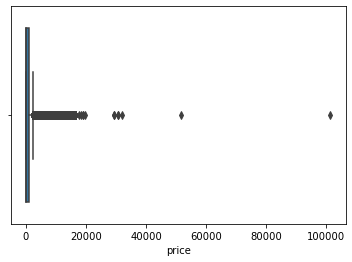

In [17]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='value'>

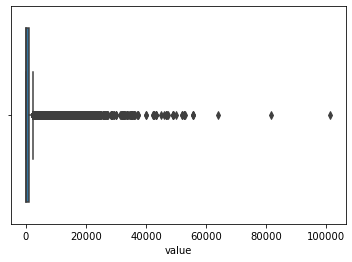

In [18]:
sns.boxplot(df['value'])

<AxesSubplot:xlabel='qty_ordered'>

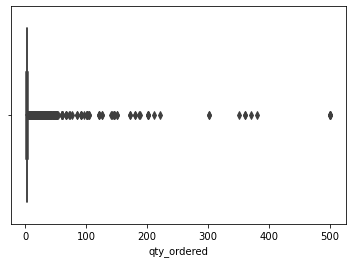

In [19]:
# the Boxplot graph shows that both the variables have Outliners.
sns.boxplot(df['qty_ordered'])

<AxesSubplot:xlabel='discount_amount'>

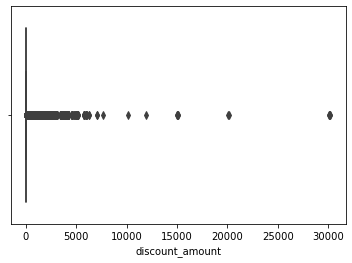

In [20]:
sns.boxplot(df['discount_amount'])

<AxesSubplot:xlabel='total'>

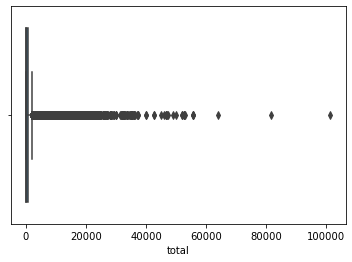

In [21]:
sns.boxplot(df['total'])

<AxesSubplot:xlabel='Discount_Percent'>

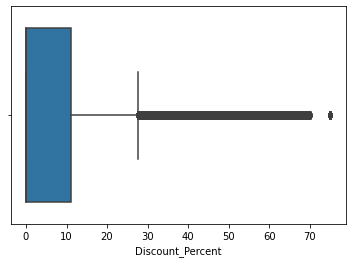

In [22]:
sns.boxplot(df['Discount_Percent'])

In [23]:
df['price'].quantile(.95)

3684.2

In [24]:
df['total'].quantile(0.99)

8959.9

In [25]:
df['price'].median()

119.0

In [26]:
# 'complete' in the status column means the deal has done and the payment has made. so I only want those transctions to make Sales related charts.
com=df[df['status']=='complete']
com

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Gender,age,Customer Since,County,City,State,Zip,Region,Discount_Percent,Full_Name
2,100354680,2020-10-01,complete,574777,mdeal_DMC-610-8,9.0,149.9,1199.2,0.00,1199.20,Men's Fashion,cod,Net,60124,2020,Oct-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
3,100354680,2020-10-01,complete,574779,oasis_Oasis-061-36,9.0,79.9,639.2,0.00,639.20,Men's Fashion,cod,Net,60124,2020,Oct-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
24,100403536,2020-12-24,complete,657777,APPWES59CA4D59CB41A,3.0,254.8,509.6,101.92,407.68,Appliances,Easypay,Net,42485,2020,Dec-2020,171143,M,28.0,1981-02-04,Bradford,Graham,FL,32042,South,20.0,Prof. Lee S Eaker
25,100403536,2020-12-24,complete,657778,APPPHI5A09939191938,3.0,315.5,631.0,126.20,504.80,Appliances,Easypay,Net,42485,2020,Dec-2020,171143,M,28.0,1981-02-04,Bradford,Graham,FL,32042,South,20.0,Prof. Lee S Eaker
26,100403536,2020-12-24,complete,657779,HALSHO59F836EF959B9,3.0,69.8,139.6,27.92,111.68,Home & Living,Easypay,Net,42485,2020,Dec-2020,171143,M,28.0,1981-02-04,Bradford,Graham,FL,32042,South,20.0,Prof. Lee S Eaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281773,100554480,2021-09-02,complete,891708,KABSEV59AC53BD0854E,2.0,29.0,29.0,0.00,29.00,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton
281774,100554480,2021-09-02,complete,891709,KABMUM59F820B22ACE4,2.0,34.9,34.9,0.00,34.90,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton
281775,100554480,2021-09-02,complete,891710,KABMUM5A5881B8EC67A,3.0,9.0,18.0,0.00,18.00,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton
281776,100554480,2021-09-02,complete,891711,KABMUM5A5881B874C96,2.0,9.0,9.0,0.00,9.00,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton


In [27]:
# Filter out 0 from the item price 
com=com[com['total']>0]

In [28]:
com[['qty_ordered','price','value','discount_amount','total','age','Discount_Percent']].describe()

,qty_ordered,price,value,discount_amount,total,age,Discount_Percent
count,84795.000000,84795.000000,84795.000000,84795.000000,84795.000000,84795.000000,84795.000000
mean,2.905266,678.428616,852.094501,113.507458,738.587042,46.505938,7.956377
std,3.765545,1218.568578,1475.676675,264.528029,1278.472947,16.570305,10.707439
min,2.000000,0.100000,0.100000,0.000000,0.100000,18.000000,0.000000
25%,2.000000,49.800000,64.800000,0.000000,60.000000,32.000000,0.000000
50%,2.000000,115.000000,178.200000,0.000000,159.800000,47.000000,0.000000
75%,3.000000,950.000000,1269.900000,160.000000,1067.175000,61.000000,15.001500
max,301.000000,18969.100000,20787.800000,5000.000000,20787.800000,75.000000,75.000000


In [39]:
com['total'].quantile(0.95)

2855.870900000005

In [30]:
com['price'].quantile(.99)

6979.2

In [31]:
# Filter out 0 from the item price 
com=com[com['price']>0]

In [32]:
df['status'].value_counts()

canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: status, dtype: int64

In [33]:
df[df['status']=='received']

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Gender,age,Customer Since,County,City,State,Zip,Region,Discount_Percent,Full_Name
0,100354678,2020-10-01,received,574772,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
1,100354678,2020-10-01,received,574774,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
4,100367357,2020-11-13,received,595185,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
5,100367357,2020-11-13,received,595186,MEFBUY59B7C3DDC2CA3-42,2.0,39.9,39.9,0.0,39.9,Men's Fashion,cod,Valid,60124,2020,Nov-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
106,100354697,2020-10-01,received,574803,Essentials_EDFH1032CGM-XL,2.0,29.9,29.9,0.0,29.9,Men's Fashion,jazzwallet,Valid,31655,2020,Oct-2020,852167,F,38.0,2003-07-20,Maricopa,Phoenix,AZ,85015,West,0.0,Ms. Lauran Z Mayo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286255,100562148,2021-09-29,received,904774,APPPHI59E0BB7CDCB10,2.0,168.5,168.5,0.0,168.5,Appliances,bankalfalah,Valid,115256,2021,Sep-2021,309024,M,52.0,1999-04-15,Norfolk (city),Norfolk,VA,23530,South,0.0,Mr. Ernesto A Fales
286256,100562148,2021-09-29,received,904775,COMHP5B69D9E3B7CB5,2.0,1284.2,1284.2,0.0,1284.2,Computing,bankalfalah,Valid,115256,2021,Sep-2021,309024,M,52.0,1999-04-15,Norfolk (city),Norfolk,VA,23530,South,0.0,Mr. Ernesto A Fales
286275,100562180,2021-09-29,received,904834,WOFSHO5AA7F46F5D965,2.0,25.0,25.0,0.0,25.0,Women's Fashion,cod,Valid,115268,2021,Sep-2021,275139,M,41.0,2011-10-02,Yukon-Koyukuk (CA),Grayling,AK,99590,West,0.0,Mr. Olin L Boger
286300,100562229,2021-09-29,received,904923,BKSMAR5B51C2B65F876,2.0,200.0,200.0,0.0,200.0,Books,cod,Valid,115285,2021,Sep-2021,391449,M,62.0,2016-05-13,Winnebago,Rockford,IL,61125,Midwest,0.0,Hon. Victor U Hazelip


In [34]:
com[['qty_ordered','price','value','discount_amount','total','age','Discount_Percent']].describe()

,qty_ordered,price,value,discount_amount,total,age,Discount_Percent
count,84795.000000,84795.000000,84795.000000,84795.000000,84795.000000,84795.000000,84795.000000
mean,2.905266,678.428616,852.094501,113.507458,738.587042,46.505938,7.956377
std,3.765545,1218.568578,1475.676675,264.528029,1278.472947,16.570305,10.707439
min,2.000000,0.100000,0.100000,0.000000,0.100000,18.000000,0.000000
25%,2.000000,49.800000,64.800000,0.000000,60.000000,32.000000,0.000000
50%,2.000000,115.000000,178.200000,0.000000,159.800000,47.000000,0.000000
75%,3.000000,950.000000,1269.900000,160.000000,1067.175000,61.000000,15.001500
max,301.000000,18969.100000,20787.800000,5000.000000,20787.800000,75.000000,75.000000


In [35]:
com[com['value']==0]

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Gender,age,Customer Since,County,City,State,Zip,Region,Discount_Percent,Full_Name


In [36]:
com['total'].quantile(0.0001)

2.0

In [53]:
com

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Gender,age,Customer Since,County,City,State,Zip,Region,Discount_Percent,Full_Name
2,100354680,2020-10-01,complete,574777,mdeal_DMC-610-8,9.0,149.9,1199.2,0.00,1199.20,Men's Fashion,cod,Net,60124,2020,Oct-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
3,100354680,2020-10-01,complete,574779,oasis_Oasis-061-36,9.0,79.9,639.2,0.00,639.20,Men's Fashion,cod,Net,60124,2020,Oct-2020,987867,F,43.0,2006-08-22,Harmon,Vinson,OK,73571,South,0.0,Drs. Jani W Titus
24,100403536,2020-12-24,complete,657777,APPWES59CA4D59CB41A,3.0,254.8,509.6,101.92,407.68,Appliances,Easypay,Net,42485,2020,Dec-2020,171143,M,28.0,1981-02-04,Bradford,Graham,FL,32042,South,20.0,Prof. Lee S Eaker
25,100403536,2020-12-24,complete,657778,APPPHI5A09939191938,3.0,315.5,631.0,126.20,504.80,Appliances,Easypay,Net,42485,2020,Dec-2020,171143,M,28.0,1981-02-04,Bradford,Graham,FL,32042,South,20.0,Prof. Lee S Eaker
26,100403536,2020-12-24,complete,657779,HALSHO59F836EF959B9,3.0,69.8,139.6,27.92,111.68,Home & Living,Easypay,Net,42485,2020,Dec-2020,171143,M,28.0,1981-02-04,Bradford,Graham,FL,32042,South,20.0,Prof. Lee S Eaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281773,100554480,2021-09-02,complete,891708,KABSEV59AC53BD0854E,2.0,29.0,29.0,0.00,29.00,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton
281774,100554480,2021-09-02,complete,891709,KABMUM59F820B22ACE4,2.0,34.9,34.9,0.00,34.90,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton
281775,100554480,2021-09-02,complete,891710,KABMUM5A5881B8EC67A,3.0,9.0,18.0,0.00,18.00,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton
281776,100554480,2021-09-02,complete,891711,KABMUM5A5881B874C96,2.0,9.0,9.0,0.00,9.00,Kids & Baby,cod,Net,113791,2021,Sep-2021,443589,F,32.0,2006-01-31,Lincoln,Taft,TN,38488,South,0.0,Ms. Timothy Z Brotherton


In [56]:
com.to_csv(r"C:\Users\abhis\Downloads\salesdashboard.csv", index=False)

In [49]:
LTV=pd.DataFrame(com.groupby(['cust_id','month'])['total'].sum())

In [50]:
LTV

total
cust_id month             
4       Dec-2020  19304.38
        Feb-2021    107.10
        Jan-2021    298.00
        Mar-2021   1275.57
        Sep-2021     94.90
...                    ...
113303  Aug-2021    481.40
113392  Aug-2021    191.70
113565  Aug-2021    180.00
113675  Aug-2021    222.70
113791  Sep-2021    104.40

[35666 rows x 1 columns]

In [57]:
sale_ltv=com.pivot_table(index=['cust_id'],columns=['month'],values='total',aggfunc='sum',fill_value=0).reset_index()

In [58]:
sale_ltv['LTV']

month,cust_id,Apr-2021,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2020,Oct-2020,Sep-2021
0,4,0.0,0.0,19304.38,107.1,298.0,0.0,0.0,1275.57,0.0,0.0,0.0,94.9
1,15,0.0,0.0,0.00,79.9,0.0,0.0,0.0,0.00,0.0,57.4,79.5,0.0
2,20,22167.0,0.0,0.00,0.0,0.0,0.0,0.0,212.70,0.0,0.0,0.0,0.0
3,21,0.0,0.0,0.00,105.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,28,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29603,113303,0.0,481.4,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
29604,113392,0.0,191.7,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
29605,113565,0.0,180.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
29606,113675,0.0,222.7,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [64]:
sale_ltv['LTV']=sale_ltv['Apr-2021']+sale_ltv['Aug-2021']+sale_ltv['Dec-2020']+sale_ltv['Feb-2021']+sale_ltv['Jan-2021']+sale_ltv['Jul-2021']+sale_ltv['Jun-2021']+sale_ltv['Mar-2021']+sale_ltv['May-2021']+sale_ltv['Nov-2020']+sale_ltv['Oct-2020']+sale_ltv['Sep-2021']

In [68]:
sale_ltv

month,cust_id,Apr-2021,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2020,Oct-2020,Sep-2021,LTV
0,4,0.0,0.0,19304.38,107.1,298.0,0.0,0.0,1275.57,0.0,0.0,0.0,94.9,21079.95
1,15,0.0,0.0,0.00,79.9,0.0,0.0,0.0,0.00,0.0,57.4,79.5,0.0,216.80
2,20,22167.0,0.0,0.00,0.0,0.0,0.0,0.0,212.70,0.0,0.0,0.0,0.0,22379.70
3,21,0.0,0.0,0.00,105.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,105.00
4,28,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,70.0,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29603,113303,0.0,481.4,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,481.40
29604,113392,0.0,191.7,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,191.70
29605,113565,0.0,180.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,180.00
29606,113675,0.0,222.7,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,222.70


In [69]:
sale_ltv.to_csv(r"C:\Users\abhis\Downloads\Ltv.csv", index=False)